## Data

In [1]:
import numpy as np

# Step 1: Generating synthetic data
np.random.seed(42)
x = np.linspace(10, 50, 1000)  # Independent variable (e.g., hours studied)
y = 3 * x + np.random.normal(0, 10, 1000)  # Dependent variable (e.g., exam score)

# Preview the data
x[:5], y[:5]

df = pd.DataFrame(data={
    'x': x,
    'y': y
})

df

,x,y
0,10.00000,34.967142
1,10.04004,28.737477
...,...,...
998,49.95996,144.168090
999,50.00000,155.725828


## Linear regression

### Fit

In [2]:
from sklearn.linear_model import LinearRegression

X = df[['x']]
y = df['y']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

#### Coefficients

In [3]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['x'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([3.03004599]),
 'rank_': 1,
 'singular_': array([365.5137028]),
 'intercept_': -0.7080592814676834}

### Predictions

#### Calculate

Use optimized numbers from mathematical equation to calculate predictions.

In [4]:
y_pred = model.predict(X)
y_pred

array([ 29.59240067,  29.71372383,  29.83504699,  29.95637015,
        30.07769332,  30.19901648,  30.32033964,  30.44166281,
        30.56298597,  30.68430913,  30.80563229,  30.92695546,
        31.04827862,  31.16960178,  31.29092495,  31.41224811,
        31.53357127,  31.65489444,  31.7762176 ,  31.89754076,
        32.01886392,  32.14018709,  32.26151025,  32.38283341,
        32.50415658,  32.62547974,  32.7468029 ,  32.86812606,
        32.98944923,  33.11077239,  33.23209555,  33.35341872,
        33.47474188,  33.59606504,  33.71738821,  33.83871137,
        33.96003453,  34.08135769,  34.20268086,  34.32400402,
        34.44532718,  34.56665035,  34.68797351,  34.80929667,
        34.93061983,  35.051943  ,  35.17326616,  35.29458932,
        35.41591249,  35.53723565,  35.65855881,  35.77988198,
        35.90120514,  36.0225283 ,  36.14385146,  36.26517463,
        36.38649779,  36.50782095,  36.62914412,  36.75046728,
        36.87179044,  36.9931136 ,  37.11443677,  37.23

In [5]:
df['y_pred'] = y_pred
df

,x,y,y_pred
0,10.00000,34.967142,29.592401
1,10.04004,28.737477,29.713724
...,...,...,...
998,49.95996,144.168090,150.672917
999,50.00000,155.725828,150.794240


#### Plot

##### Basic

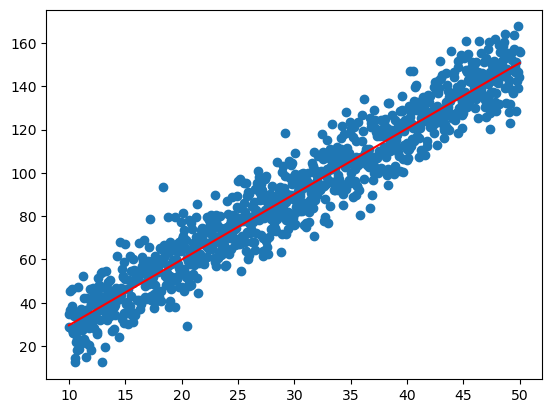

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(df['x'], df['y'])
ax.plot(df['x'], df['y_pred'], color='red')

plt.show()

##### Custom

In [13]:
slope = model.coef_[0]
intercept = model.intercept_

formula = f'$y = {slope:.2f}x + {intercept:.2f}$'
formula

'$y = 3.03x + -0.71$'

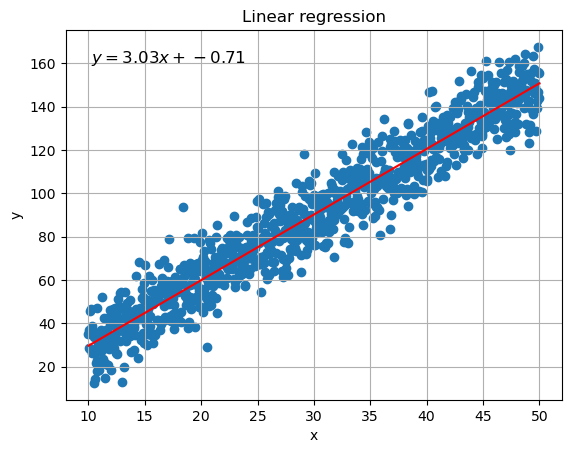

In [14]:
fig, ax = plt.subplots()

ax.scatter(df['x'], df['y'])
ax.plot(df['x'], df['y_pred'], color='red')
ax.set_title('Linear regression')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.text(0.05, 0.95, formula, transform=ax.transAxes, fontsize=12, verticalalignment='top')
ax.grid(True)

plt.show()

### Evaluate

The prediction is not perfect because there is a difference between predicted and actual values; ie. error.


#### Calculate R-squared

In [15]:
df['error'] = df['y'] - df['y_pred']
df['error2'] = df['error'] ** 2
df

,x,y,y_pred,error,error2
0,10.00000,34.967142,29.592401,5.374741,28.887839
1,10.04004,28.737477,29.713724,-0.976247,0.953058
...,...,...,...,...,...
998,49.95996,144.168090,150.672917,-6.504827,42.312778
999,50.00000,155.725828,150.794240,4.931587,24.320554


In [16]:
MSE = df['error2'].mean()
RMSE = MSE ** 0.5
RMSE

9.781098596598282

In [17]:
R2 = 1 - MSE / df['y'].var()
R2

0.9277200157888468

#### Plot

In [18]:
formula

'$y = 3.03x + -0.71$'

In [19]:
r2 = f'$R^2: {R2:.3f}$'
r2

'$R^2: 0.928$'

In [20]:
text = f'{formula}\n{r2}'
text

'$y = 3.03x + -0.71$\n$R^2: 0.928$'

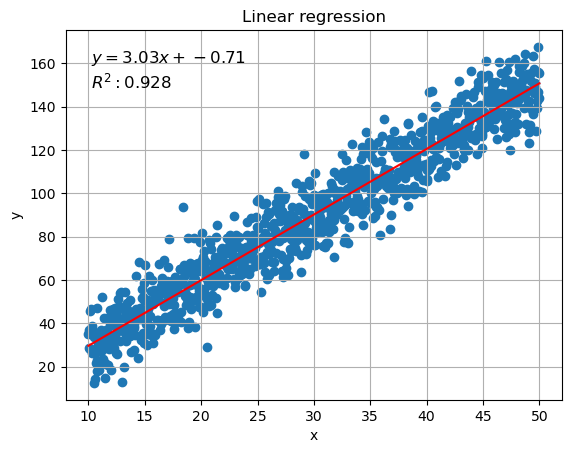

In [26]:
fig, ax = plt.subplots()

ax.scatter(df['x'], df['y'])
ax.plot(df['x'], df['y_pred'], color='red')
ax.set_title('Linear regression')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.text(0.05, 0.95, text, transform=ax.transAxes, fontsize=12, verticalalignment='top')
ax.grid(True)

plt.show()

### Interpretation

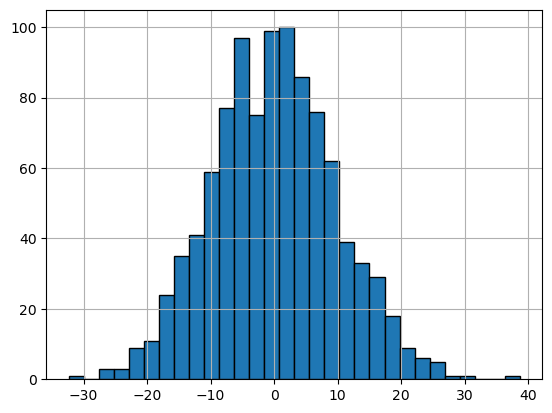

In [22]:
df['error'].hist(bins=30, edgecolor='black');

In [23]:
RMSE

9.781098596598282

$$
\text{RMSE} = \sigma = \sqrt{\frac{1}{N}\sum_{i=1}^{N}(y_i - \hat{y}_i)^2}
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Standard_deviation_diagram_micro.svg" style="background-color:white;">

### Assumptions

1. Linearity
2. Independence
3. Normality
4. Equal variance
5. No multicollinearity

In [46]:
residuals = df['error']

#### Normality of residuals

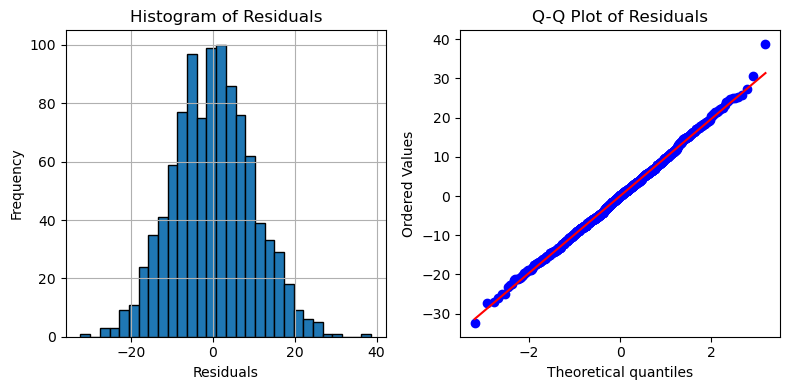

In [47]:
from scipy import stats

fig, ax = plt.subplots(1, 2, figsize=(8, 4), dpi=100)

residuals.hist(bins=30, edgecolor='black', ax=ax[0])
ax[0].set_title('Histogram of Residuals')
ax[0].set_xlabel('Residuals')
ax[0].set_ylabel('Frequency')

stats.probplot(df['error'], dist="norm", plot=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

1. **Shapiro-Wilk Test**

   - **When**: Small to moderate sample sizes (n < 2000).
   - **Why**: Powerful for detecting general deviations from normality.
   - **Example**: Small experimental datasets in psychology or biology.

2. **Kolmogorov-Smirnov (K-S) Test**

   - **When**: Large sample sizes (n > 2000).
   - **Why**: Good for general normality checks, particularly in large datasets.
   - **Example**: Large survey or population data.

3. **Anderson-Darling Test**

   - **When**: Concerned about deviations in the tails of the distribution.
   - **Why**: More sensitive to issues in the tails than other tests.
   - **Example**: Financial data with potential outliers.

4. **D’Agostino and Pearson’s Test**

   - **When**: Interested in skewness or kurtosis.
   - **Why**: Tests for both skewness and kurtosis (asymmetry and peakedness).
   - **Example**: Social science or psychology data where the shape of the distribution matters.

In [48]:
from scipy import stats
shapiro_test = stats.shapiro(residuals)

print(f"Shapiro-Wilk Test statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")

Shapiro-Wilk Test statistic: 0.9987, p-value: 0.6717


#### Residuals vs. Predictions

A residual plot helps detect non-linear relationships by plotting the residuals (errors) against the predicted (fitted) values. If the relationship is linear, the residuals should be randomly scattered around zero, with no distinct pattern. Any visible pattern, such as a curve or funnel shape, suggests non-linearity.

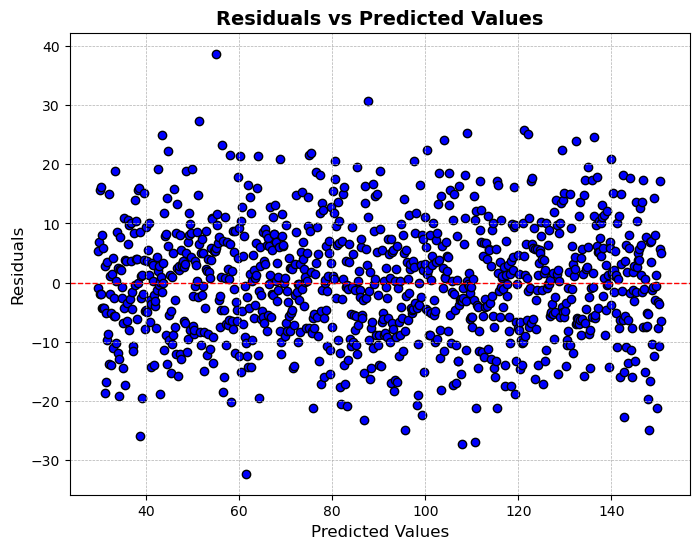

In [27]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(df['y_pred'], residuals, color='blue', edgecolors='black')
ax.axhline(0, color='red', linestyle='--', linewidth=1)

ax.set_title('Residuals vs Predicted Values', fontsize=14, weight='bold')
ax.set_xlabel('Predicted Values', fontsize=12)
ax.set_ylabel('Residuals', fontsize=12)

ax.grid(True, linestyle='--', linewidth=0.5)
plt.show()

#### Homoscedasticity (Equal variance)



The Breusch-Pagan test examines whether the variance of the residuals is dependent on the fitted values. The null hypothesis is that the residuals are homoscedastic (i.e., their variance is constant).

In [52]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Fit the model using statsmodels (if not already done)
X = sm.add_constant(X)  # Adding a constant to the independent variables
model = sm.OLS(y, X).fit()

# Perform the Breusch-Pagan test
test = het_breuschpagan(model.resid, model.model.exog)

# Test returns: (Lagrange multiplier statistic, p-value, f-value, f p-value)
print(f'Lagrange multiplier statistic: {test[0]:.4f}, p-value: {test[1]:.4f}')

Lagrange multiplier statistic: 0.0408, p-value: 0.8398


Interpretation:
- p-value > 0.05: Fail to reject the null hypothesis (assume homoscedasticity).
- p-value < 0.05: Reject the null hypothesis, indicating heteroscedasticity.

#### Multicollinearity

In [56]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Assuming df is your DataFrame with independent variables
X = df[['x']]  # Independent variables
X = sm.add_constant(X)  # Add a constant term to the model

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each independent variable
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  feature       VIF
0   const  7.736513
1       x  1.000000


## Conclusions